<a href="https://colab.research.google.com/github/pedrohortencio/applied-data-science-with-python/blob/main/BreakHis/breakhis_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[Breast Cancer Histopathological Database - UFPR](https://web.inf.ufpr.br/vri/databases/breast-cancer-histopathological-database-breakhis/)

In [ ]:
from google.colab import drive
import os, sys, shutil

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import cv2
from glob import glob

import tensorflow as tf
import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense, Input, Dropout, Conv2D, MaxPooling2D, Concatenate, Flatten, GlobalMaxPooling2D, GlobalAveragePooling2D, BatchNormalization, ReLU
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
from tensorflow.keras.optimizers import Adam, SGD

from sklearn.utils import shuffle

sns.set_theme()

drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install pyfastcopy
import pyfastcopy

  Created wheel for pyfastcopy: filename=pyfastcopy-1.0.3-cp37-none-any.whl size=3770 sha256=cab091e7c47ea5ae023c347cb9bcbffb14b62a8fbd65b55543bafa1e9a7f5bff
  Stored in directory: /root/.cache/pip/wheels/43/ef/5b/424484e3955a0ac0e364fbf2648aaaab4be135b69a8b2b216d
Successfully built pyfastcopy


In [ ]:
print("Quantidade de Amostras Benignas:",
      len(os.listdir('/content/drive/MyDrive/data_400X/SOB/400X/benign')))

print("Quantidade de Amostras Malignas:",
      len(os.listdir('/content/drive/MyDrive/data_400X/SOB/400X/malignant')))

Quantidade de Amostras Benignas: 588
Quantidade de Amostras Malignas: 1232


In [ ]:
caminho_base = "/content/drive/MyDrive/data_400X/SOB/400X"

In [ ]:
lista_imgs_b = glob(r"/content/drive/MyDrive/data_400X/SOB/400X/benign/*.png")
lista_imgs_m = glob(r"/content/drive/MyDrive/data_400X/SOB/400X/malignant/*.png")

lista_imgs_b = shuffle(lista_imgs_b, random_state = 42)
lista_imgs_m = shuffle(lista_imgs_m, random_state=42)

In [ ]:
lista_imgs_b[:2]

['/content/drive/MyDrive/data_400X/SOB/400X/benign/SOB_B_TA-14-16184CD-400-022.png',
 '/content/drive/MyDrive/data_400X/SOB/400X/benign/SOB_B_F-14-23060CD-400-015.png']

In [ ]:
lista_imgs_m[:2]

['/content/drive/MyDrive/data_400X/SOB/400X/malignant/SOB_M_DC-14-9461-400-025.png',
 '/content/drive/MyDrive/data_400X/SOB/400X/malignant/SOB_M_DC-14-12312-400-024.png']

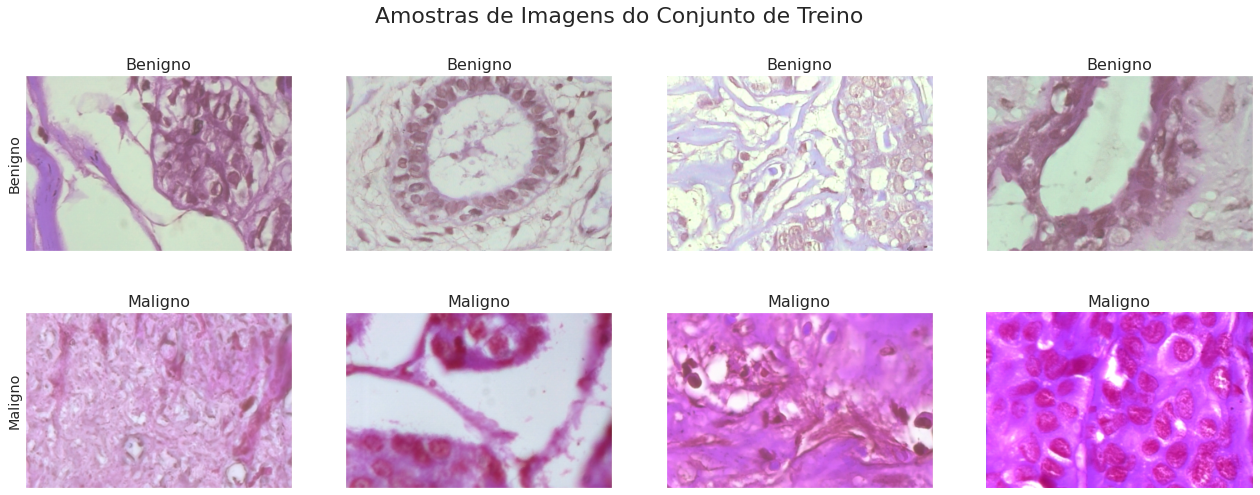

In [ ]:
figure_cols = 4

categories = ["Benigno", "Maligno"]

# Cria a figura
f, ax = plt.subplots(nrows=len(categories),ncols=figure_cols, 
                      figsize=(22,8))

# Loop sobre o index criado anteriormente
for i, cat in enumerate(categories):
    # Seleciona aleatoriamente (figure_cols) imagens
    if cat == "Benigno":
        sample = shuffle(lista_imgs_b)
    else:
        sample = shuffle(lista_imgs_m)

    # Loop que preenche os subplots com as imagens elecionadas
    for j in range(0,figure_cols):
        file = sample[j]    
        im=cv2.imread(file)                                 # Lê a imagem
        ax[i, j].imshow(im, resample=True, cmap='gray')     # Plota a imagem
        ax[i, j].set_title(cat, fontsize=16)                # Cria um título
        ax[i, j].grid(False)                                # Desabilita o grid
        plt.box(False)                              # Desabilita a caixa do gráfico
        ax[i, j].set_xticks([])                     # Desabilita os números no eixo x
        ax[i, j].set_yticks([])                     # Desabilita os números no eixo y



ax[0,0].set_ylabel('Benigno', size='large')
ax[1,0].set_ylabel('Maligno', size='large')


f.suptitle("Amostras de Imagens do Conjunto de Treino",
           size=22, y=0.98)

# Salva a imagem
plt.savefig("Amostra-Imagens.png",
            bbox_inches='tight', dpi=100)

# Realiza o plot
plt.show()

## Copiando Imagens para o Google Colab

In [ ]:
# Criando uma nova pasta/diretório
dir_base = 'dir_base'
os.mkdir(dir_base)

# Dentro da pasta "dir_base", haverá a seguinte estrutura:

# dir_treino
    # a_benigno
    # b_maligno

# dir_teste
    # a_benigno
    # b_maligno


# Criando a pasta "dir_treino"
dir_treino = os.path.join(dir_base, 'dir_treino')
os.mkdir(dir_treino)

# Criando a pasta "dir_teste"
dir_teste = os.path.join(dir_base, 'dir_teste')
os.mkdir(dir_teste)


# Criando as pastas que ficarão dentro das pastas "dir_treino" e "dir_teste"
# Dentro dessas pastas estarão as imagens correspondentes a cada um dos labels

# Crindo pastas dentro de "dir_treino"
benigno = os.path.join(dir_treino, 'a_benigno')
os.mkdir(benigno)
maligno = os.path.join(dir_treino, 'b_maligno')
os.mkdir(maligno)

# Criando pastas dentro de "dir_teste"
benigno = os.path.join(dir_teste, 'a_benigno')
os.mkdir(benigno)
maligno = os.path.join(dir_teste, 'b_maligno')
os.mkdir(maligno)

In [ ]:
# Checando as pastas no diretório base
os.listdir('dir_base')

['dir_teste', 'dir_treino']

In [ ]:
# Checando as pastas no diretório de treino
os.listdir('dir_base/dir_treino')

['b_maligno', 'a_benigno']

In [ ]:
# Checando as pastas no diretório de teste
os.listdir('dir_base/dir_teste')

['b_maligno', 'a_benigno']

In [ ]:
num_amostras_b = int(np.ceil(len(lista_imgs_b)*0.25))       # 147
num_amostras_m = int(np.ceil(len(lista_imgs_m)*0.25))       # 308

# Mudando as imagens de pasta
for count, image in enumerate(lista_imgs_b):
    
    # Da imagem 0 - 146 (147 amostras): salvar na pasta /content/dir_base/dir_teste/a_benigno
    # Da imagem 147 - 588 (441 amostras): salvar na pasta /content/dir_base/dir_treino/a_benigno
    
    if count < num_amostras_b:
        dir = '/content/dir_base/dir_teste/a_benigno'
    else:
        dir = '/content/dir_base/dir_treino/a_benigno'


    src = image                                         # Define o caminho de origem
    dst = os.path.join(dir, image.split('/')[-1])       # Define o caminho de destino
    
    shutil.copyfile(src, dst)                   # Copia a imagem de uma pasta para outra


# Mesmo processo, mas para as imagens de Teste

for count, image in enumerate(lista_imgs_m):
    
    # Da imagem 0 - 307 (308 amostras): salvar na pasta /content/dir_base/dir_teste/b_maligno
    # Da imagem 308 - 1232 (924 amostras): salvar na pasta /content/dir_base/dir_treino/b_maligno
    
    if count < num_amostras_m:
        dir = '/content/dir_base/dir_teste/b_maligno'
    else:
        dir = '/content/dir_base/dir_treino/b_maligno'


    src = image                                         # Define o caminho de origem
    dst = os.path.join(dir, image.split('/')[-1])       # Define o caminho de destino
    
    shutil.copyfile(src, dst)                   # Copia a imagem de uma pasta para outra

In [ ]:
print("Quantidade de Amostras Benignas de Treino:",
      len(os.listdir('/content/dir_base/dir_treino/a_benigno')))

print("Quantidade de Amostras Benignas de Teste:",
      len(os.listdir('/content/dir_base/dir_teste/a_benigno')))

print("Quantidade de Amostras Malignas de Treino:",
      len(os.listdir('/content/dir_base/dir_treino/b_maligno')))

print("Quantidade de Amostras Malignas de Teste:",
      len(os.listdir('/content/dir_base/dir_teste/b_maligno')))

Quantidade de Amostras Benignas de Treino: 441
Quantidade de Amostras Benignas de Teste: 147
Quantidade de Amostras Malignas de Treino: 924
Quantidade de Amostras Malignas de Teste: 308


## Criação do ImageDataGenerator

In [ ]:
BATCH_SIZE = 32
TAMANHO_IMAGEM = 96
train_path = '/content/dir_base/dir_treino'     # Caminho das imagens de treino
test_path = '/content/dir_base/dir_teste'       # Caminho das imagens de teste

num_amostras_treino = len(os.listdir('/content/dir_base/dir_treino/a_benigno')) + len(os.listdir('/content/dir_base/dir_teste/a_benigno'))   

In [ ]:
datagen_exemplo = ImageDataGenerator(brightness_range=[.95,1.05],
                                     channel_shift_range=20,
                                     zoom_range=[0.95,0.95],
                                     horizontal_flip=True,
                                     vertical_flip=True)

Found 1365 images belonging to 2 classes.


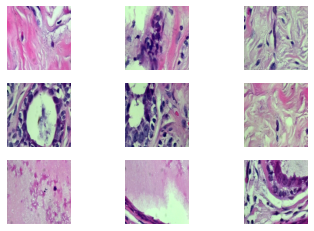

In [ ]:
it = datagen_exemplo.flow_from_directory(
            train_path, shuffle=False, batch_size=1)
# generate samples and plot
for i in range(9):
    # define subplot
    plt.subplot(330 + 1 + i)
    # generate batch of images
    batch = it.next()
    # convert to unsigned integers for viewing
    image = batch[0].astype('uint8')
    # plot raw pixel data
    plt.grid(False)
    plt.box(False)
    plt.xticks([])
    plt.yticks([])
    plt.imshow(image[0])

# show the figure
plt.show()

In [ ]:
datagen_treino = ImageDataGenerator(rescale=1.0/255,
                             brightness_range=[.95,1.05],
                             channel_shift_range=20,
                             zoom_range=[0.95,0.95],
                             horizontal_flip=True,
                             vertical_flip=True)

datagen_val = ImageDataGenerator(rescale=1.0/255,
                                 horizontal_flip=True,
                                vertical_flip=True,
                                 validation_split=0.2)

datagen_teste = ImageDataGenerator(rescale=1.0/255)

In [ ]:
gen_treino = datagen_treino.flow_from_directory(
            train_path,
            target_size=(TAMANHO_IMAGEM, TAMANHO_IMAGEM),
            batch_size=BATCH_SIZE,
            subset="training",
            #shuffle=False,
            seed=42,
            class_mode='binary',
)

gen_val = datagen_val.flow_from_directory(
            train_path,
            target_size=(TAMANHO_IMAGEM, TAMANHO_IMAGEM),
            batch_size=BATCH_SIZE,
            subset="validation",
            #shuffle=False,
            seed=42,
            class_mode='binary',
)

test_gen = datagen_teste.flow_from_directory(
            test_path,
            target_size=(TAMANHO_IMAGEM,TAMANHO_IMAGEM),
            batch_size=1,               # Teste será gerado imagem a imagem
            class_mode='binary',   
            shuffle=False)   

Found 1365 images belonging to 2 classes.
Found 272 images belonging to 2 classes.
Found 455 images belonging to 2 classes.


In [ ]:
STEP_SIZE_TREINO = gen_treino.n // gen_treino.batch_size

STEP_SIZE_VAL = gen_val.n // gen_val.batch_size

## Construção do Modelo

In [ ]:
"""model = Sequential()
model.add(conv_base)
model.add(Conv2D(64, (3,3)))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D())
model.add(BatchNormalization())

model.add(Conv2D(32, (3,3)))
model.add(LeakyReLU(alpha=0.1))
#model.add(BatchNormalization())

#model.add(Flatten())
model.add(GlobalAveragePooling2D())


#model.add(Dropout(.1))

#model.add(Dense(32))
#model.add(ReLU())
#model.add(Dropout(.3))

model.add(Dense(1, activation='sigmoid'))"""

In [ ]:
inputs = Input((96, 96, 3))

conv1 = Conv2D(128, (3,3), activation=ReLU())(inputs)
maxPool1 = MaxPooling2D()(conv1)

conv2 = Conv2D(32, (3,3), activation=ReLU())(maxPool1)
maxPool2 = MaxPooling2D()(conv2)

#conv3 = Conv2D(64, (3,3), activation=ReLU())(maxPool2)
#maxPool3 = MaxPooling2D()(conv3)

out1 = GlobalMaxPooling2D()(maxPool2)
out2 = GlobalAveragePooling2D()(maxPool2)
out3 = Flatten()(maxPool2)

concat = Concatenate(axis=-1)([out1, out2, out3])
dropout1 = Dropout(0.1)(concat)

dense1 = Dense(128, activation='relu')(dropout1)
dropout2 = Dropout(0.3)(dense1)

dense2 = Dense(64, activation='relu')(dropout2)


out = Dense(1, activation='sigmoid')(dense2)

model = keras.models.Model(inputs, out)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 96, 96, 3)]  0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 94, 94, 128)  3584        input_1[0][0]                    
__________________________________________________________________________________________________
max_pooling2d (MaxPooling2D)    (None, 47, 47, 128)  0           conv2d[0][0]                     
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 45, 45, 32)   36896       max_pooling2d[0][0]              
______________________________________________________________________________________________

In [ ]:
#SGD(lr=0.01, nesterov=True)
model.compile(Adam(), loss='binary_crossentropy', 
              metrics=['accuracy', tf.keras.metrics.AUC(), tf.keras.metrics.Recall()])

In [ ]:
print(gen_treino.class_indices)
print(gen_val.class_indices)

{'a_benigno': 0, 'b_maligno': 1}
{'a_benigno': 0, 'b_maligno': 1}


In [ ]:
filepath = "content/model.h5"
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=2, 
                              verbose=1, mode='max', min_lr=0.00001)
checkpoint = ModelCheckpoint(filepath, monitor='val_accuracy', verbose=1, 
                             save_best_only=True, mode='max')
early_stop = EarlyStopping(monitor='val_loss', patience=6)

In [ ]:
history = model.fit(gen_treino, steps_per_epoch=STEP_SIZE_TREINO, 
                              validation_data=gen_val,
                              validation_steps=STEP_SIZE_VAL,
                              epochs=50, verbose=1,
                              callbacks=[reduce_lr, checkpoint, early_stop])

Epoch 1/50
42/42 [==============================] - 50s 1s/step - loss: 0.6396 - accuracy: 0.6437 - auc_1: 0.6273 - recall_1: 0.8867 - val_loss: 0.6669 - val_accuracy: 0.5508 - val_auc_1: 0.9311 - val_recall_1: 0.3391

Epoch 00001: val_accuracy improved from -inf to 0.55078, saving model to content/model.h5
Epoch 2/50
42/42 [==============================] - 48s 1s/step - loss: 0.4916 - accuracy: 0.7847 - auc_1: 0.8198 - recall_1: 0.8991 - val_loss: 0.5242 - val_accuracy: 0.8125 - val_auc_1: 0.9437 - val_recall_1: 0.7558

Epoch 00002: val_accuracy improved from 0.55078 to 0.81250, saving model to content/model.h5
Epoch 3/50
42/42 [==============================] - 48s 1s/step - loss: 0.4522 - accuracy: 0.8160 - auc_1: 0.8392 - recall_1: 0.9342 - val_loss: 0.3891 - val_accuracy: 0.8555 - val_auc_1: 0.9408 - val_recall_1: 0.9653

Epoch 00003: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.

Epoch 00003: val_accuracy improved from 0.81250 to 0.85547, saving model to con

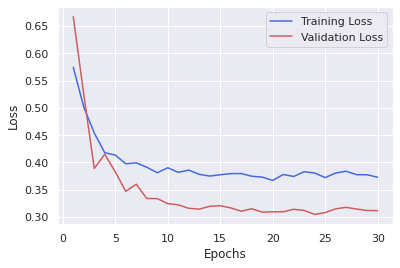

In [ ]:
epochs = range(1, len(history.history['loss'])+1)
training_loss = history.history['loss']
validation_loss = history.history['val_loss']


# b+ is for "blue cross"
plt.plot(epochs, training_loss, color='royalblue', label='Training Loss')
# "bo" is for "blue dot"
plt.plot(epochs, validation_loss, color='indianred', label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

plt.show()

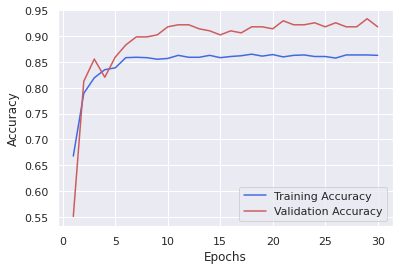

In [ ]:
epochs = range(1, len(history.history['loss'])+1)
training_acc = history.history['accuracy']
validation_acc = history.history['val_accuracy']


# b+ is for "blue cross"
plt.plot(epochs, training_acc, color='royalblue', label='Training Accuracy')
# "bo" is for "blue dot"
plt.plot(epochs, validation_acc, color='indianred', label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [155]:
model.evaluate(test_gen)

455/455 [==============================] - 8s 19ms/step - loss: 0.3811 - accuracy: 0.8857 - auc_1: 0.8687 - recall_1: 0.9383


[0.38106197118759155,
 0.8857142925262451,
 0.8686721324920654,
 0.9383116960525513]